
- Ho Chi Minh University of Technology and Education 
- Name: Nguyen Duc Tri
- Student code: 22110082
- Topic: Regression with a Crab Age Dataset

## I. Project Introduction:
## <u>1.1 Introduction:</u>
<u>1.1.1 Getting Started:</u>

**Inspiration:**
- Crabs growth is a key factor in the seafood industry, especially when it comes to consider the commercial value of crabs such as crabs' weight, crabs' meat quality, etc. Thus, acquiring a deep understanding of the age distribution within crabs population holds paramount importance for fishermen and seafood processors, in which it helps them make an optimal decision about harvesting or feeding crabs. 
- A little exception here is that this practice helps me gain a better insight into more coding algorithms of Machine Learning. 

**Dataset:**
- Kaggle provides 2 important .csv files (the first one is train.csv and the second one is test.csv). The dataset I collected is from `Kaggle`, which has only 10 columns included 9 input features and a target column for age prediction in train.csv file. The output here is the predicted value of crabs' age based in the input features in test.csv. 
- For more information: <span style="background-color: green;">ttps://https://www.kaggle.com/competitions/playground-series-s3e16</span>

**Aim:** 
- The aim of this analysis is to estimate the age of crabs accurately based on a range of crab-specific physical attributes. These attributes include: Sex, Length, Diameter, Height, Weight, Shucked Weight, Viscera Weight and Shell Weight. In the process of data exploration, I will identify all the importance features that can help me improve the model's accuracy. 
- Subsequently, in the test.csv file, there are no values in the column Age, my task here is to fill in all the values of crabs' age. 

<u>1.1.2 General Knowledge:</u>

**1. Sex:** This is the biological gender of crabs. Crabs in this dataset are categorized as Male, Female and Indeterminate (Indeterminate means not specified or known). Understanding the gender distribution of the crabs' population is essential in the fields of reproductive biology, ecology interactions and fisheries management. 

**2. Length:** The length of crabs is typically measured from the front of its rostrum (the position between its eyes) to the rear end of its carapace (the upper shell covering the crab's body). This physical attribute has a strong relation with the age and weight of crabs. 

**3. Diameter:** The diameter is the width of the carapace, which is the measurement across the widest part of the crab's body. 

**4. Height:** This can be measured from the base of the crab to the top of its carapace. 

**5. Weight:** The entire crab is typically weighed, including its shell, claws and body. Weight can be an indicator of the crab's health and age. 

**6. Shucked Weight:** This refers to the weight of the edible portion of crabs after it has been removed from its shell. This is important in the seafood industry for determining the market value of crab meat. It is a key factor in pricing and trade.

**7. Viscera Weight:** This term refers to the weight of the internal organs of crabs. 

**8. Shell Weight:** This is the weight of the hard exoskeleton (like the claws) and carapace that covers the crab's body.

**9. Age:** This refers to the age of the crab, measured in months or years. Determining the age of crabs can be challenging because crabs do not exhibit clear growth rings or other easily identifiable markers as some organisms do. But, the age of crabs plays a crucial role in scientific research, fisheries management, and conservation efforts. 



## 1.2. <u>Abstract:<u>
<u>1.2.1 Some concepts:<u> 

In this project, I will conduct an in-depth investigation on the prediction of crabs' age by using a combination of advanced Machine Learning algorithms. My first approach is data exploration, which is the process of acquiring an understanding of the given data. Next, I preprocess the data by handling all numerical values and categorical values in the dataset. And I will split the data of the 'train.csv' file into training sets and validation sets in order to enable robust model evaluation, support hyperparameter tuning and provide a more accurate assessment of a model's ability to generalize to new, unseen data.

In the process of building models, I start with `Random Forest` model for prediction, which is the well-known model in Machine Learning. Then, I use `Lazy Predict` (LazyPredict is a python library that helps you to build a lot of basic models without writing much code and help you to know which models work better without hyperparameter tuning.) to choose some top models based on scoring `r2`. In each selected model, I perform hyperparameter tuning using `GridSearchCV`.

To measure the performance of my models, I calculate `RMSE, MAE and R2` of each model and I also check what attributes are importance, which significantly impacts the models' accuracy.  



For more information about: 
- Lazy Predict:  <span style="background-color: green;">ttps:https://pypi.org/project/lazypredict/</span>
- GridSearchCV:  <span style="background-color: green;">ttps:https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html</span>



<u>1.2.2 Import library:</u> 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from lazypredict.Supervised import LazyRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split,  cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

## 1.3. <u>Overview of the data:<u>
<u>1.3.1 Loading the data:</u> 

In [2]:
import pandas as pd 
#Read the data from "train.csv"
data = pd.read_csv("train.csv")

<u>1.3.2 Explore the data:</u>

In [2]:
data.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


## II. Project Design:

## <u>2.1. Data Analysis:</u>
<u>2.1.1 Check missing data:<u>

In [3]:
print(data.isna())
print(data.isna().sum())

          id    Sex  Length  Diameter  Height  Weight  Shucked Weight  \
0      False  False   False     False   False   False           False   
1      False  False   False     False   False   False           False   
2      False  False   False     False   False   False           False   
3      False  False   False     False   False   False           False   
4      False  False   False     False   False   False           False   
...      ...    ...     ...       ...     ...     ...             ...   
74046  False  False   False     False   False   False           False   
74047  False  False   False     False   False   False           False   
74048  False  False   False     False   False   False           False   
74049  False  False   False     False   False   False           False   
74050  False  False   False     False   False   False           False   

       Viscera Weight  Shell Weight    Age  
0               False         False  False  
1               False         Fal

## Interpret the result: 
The cells corresponding to the non-missing values contains false else true. Thus, in the given dataset, there are no missing values because it shows all false values.
We can see that there are 74051 rows and 10 columns. '0' values are corresponding to each column, which shows that the total number of missing values is 0. 

<u>2.1.2 Remove Unnecessary Features:<u>

In [3]:
#Column 'id' has been removed
data = data.drop('id', axis=1)

<u>2.1.3 Histogram:<u>

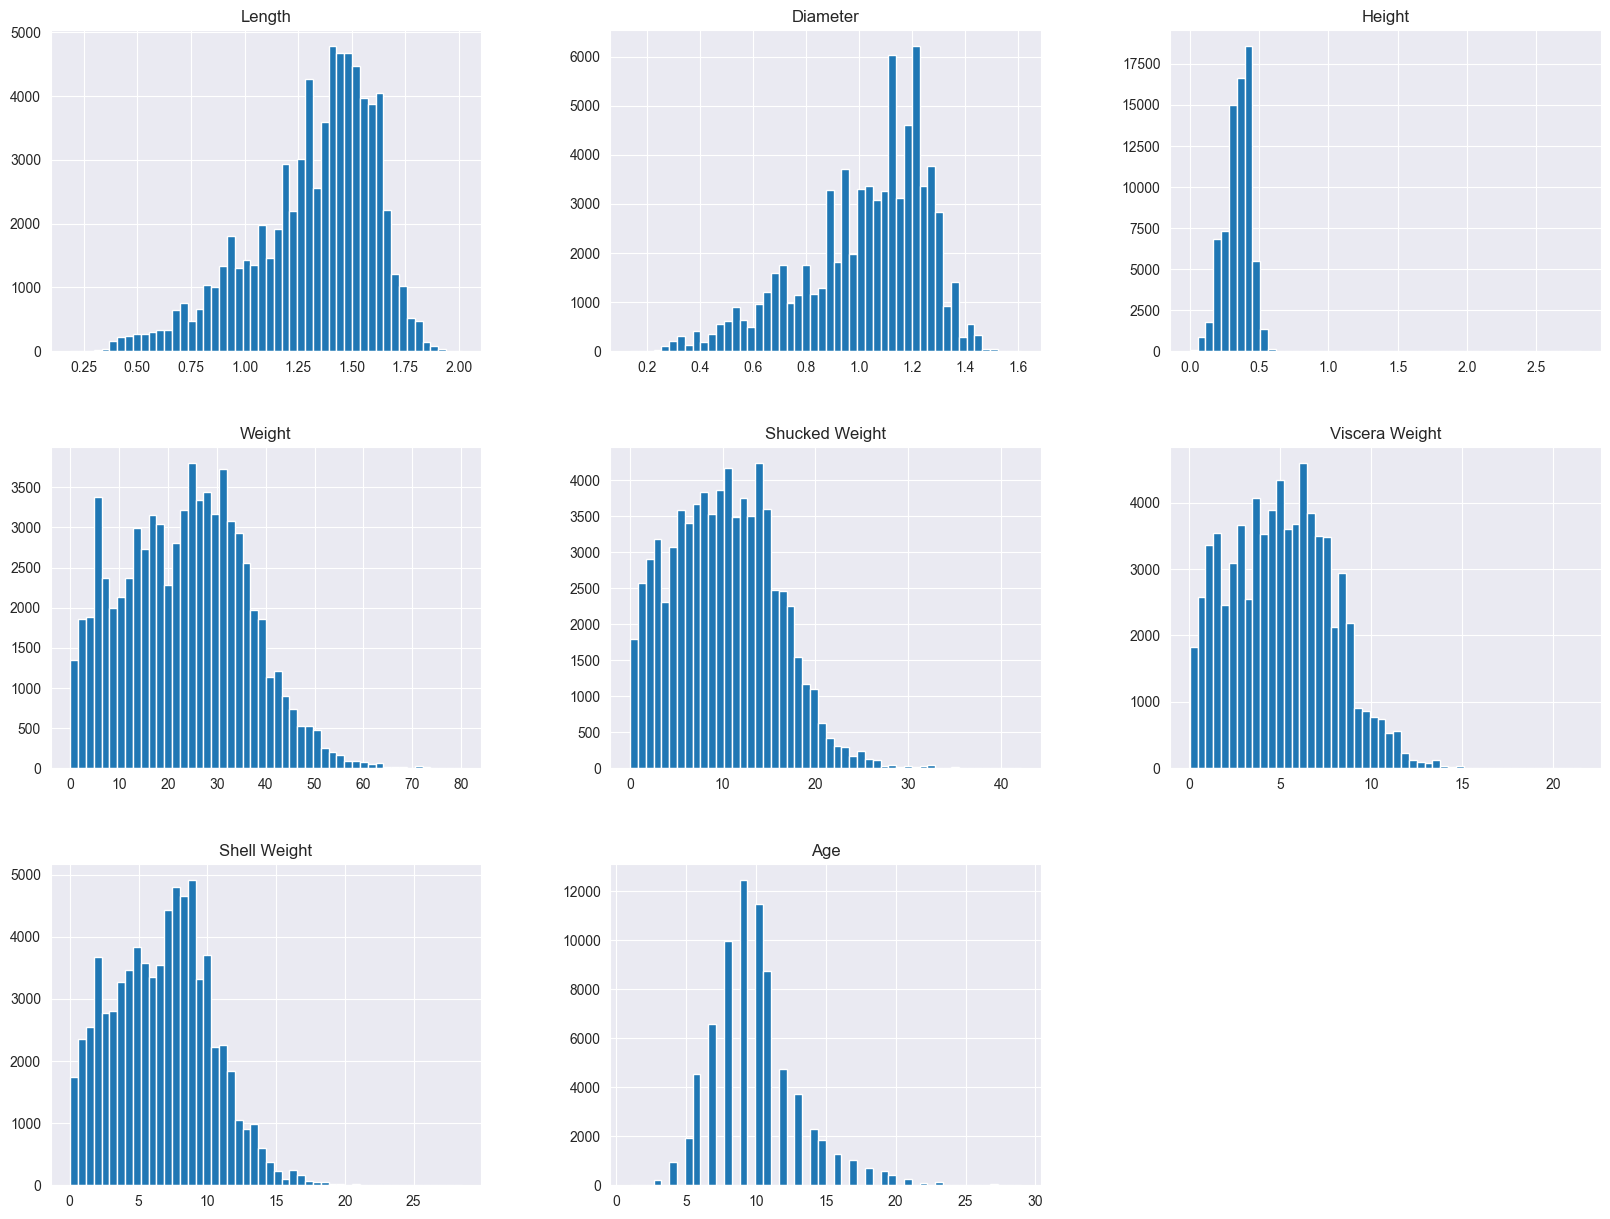

In [10]:
#For numerical data
data.hist(bins=50, figsize=(20,15))  
plt.show()

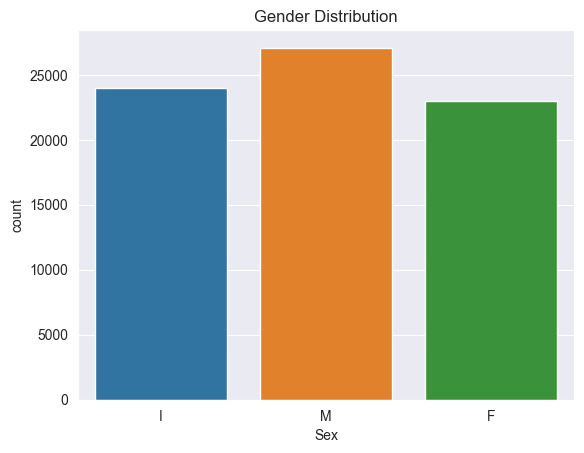

In [11]:
#For categorical data
sn.countplot(x='Sex', data=data)
plt.title('Gender Distribution')
plt.show()

## Interpret the result:
- A histogram is the most commonly used graph to show frequency distributions. 
++ From the histogram above, we know every numerical data illustrates the distribution. For example, the target feature 'Age' illustrates the skewed distribution (particularly, it is the right-skewed distribution). Positive skewness tells us the direction of outliers, which are further out towards the right; thus, the data scale on the left of the peak is condensed than its right side.  
++ Regarding the categorical data, the three component of 'Sex' feature have nearly the same value count.
- Another reason why I use histogram to visualize the data is to prepare for the 'data preprocessing' step. 

<u>2.1.4 Correlation Matrix Plot:<u>

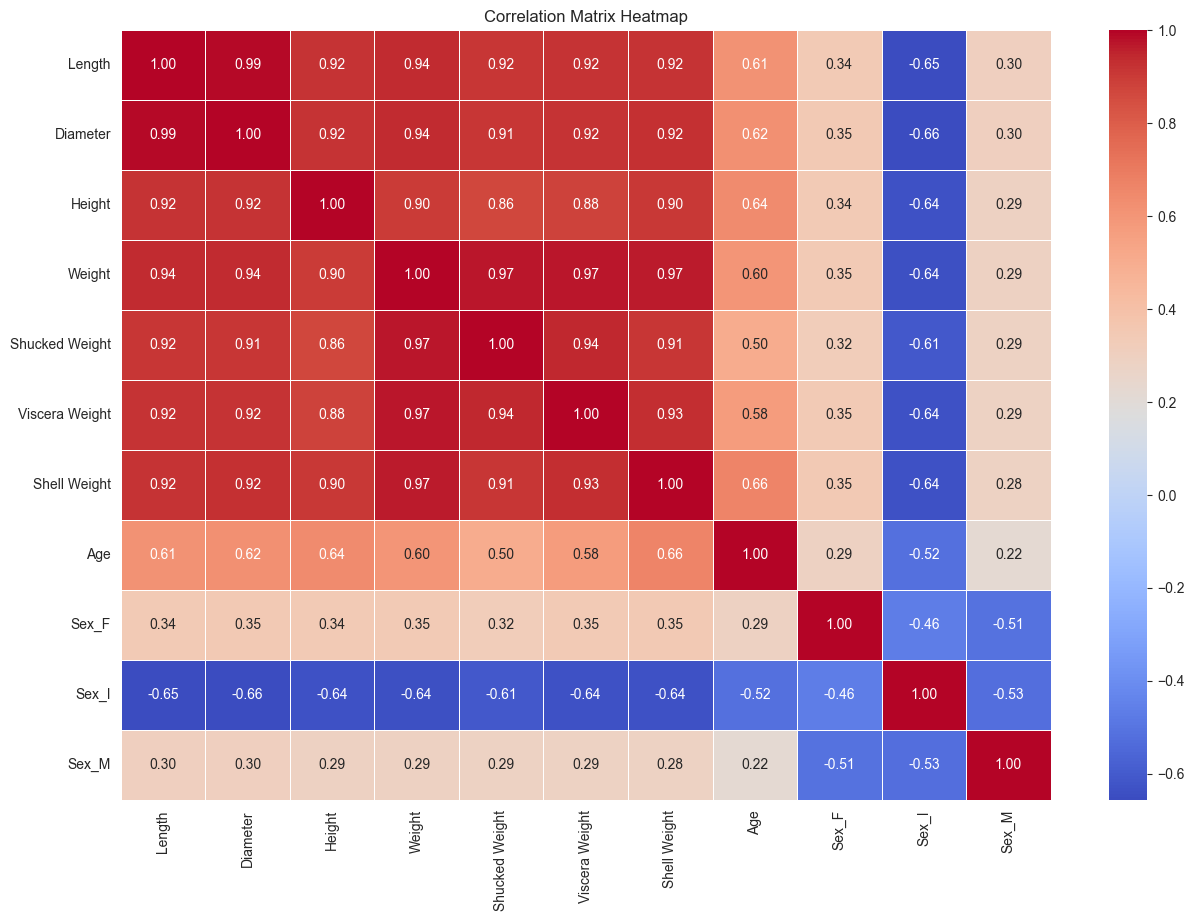

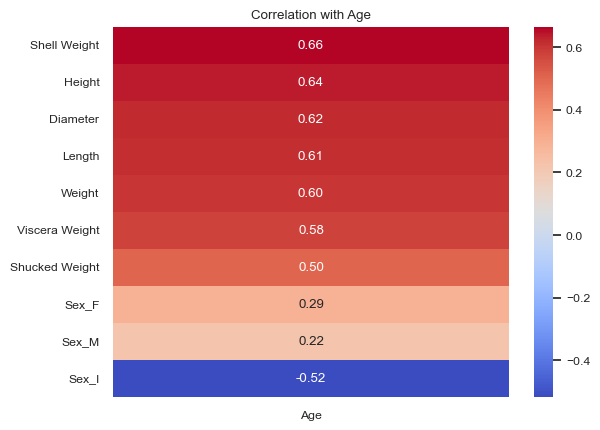

In [4]:
def transfer_categorical(data, col_name): 
    #Change the Sex column into 3 columns I, F, M 
    oh_X = pd.get_dummies(data[col_name], prefix = col_name)
    #Reconnect 3 columns with the default columns in the dataset 
    data = pd.concat([data.drop(col_name, axis=1), oh_X], axis = 1)
    return data 

corr = data.corr()A

plt.figure(figsize=(15, 10))
sn.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

target_corr = corr['Age'].drop('Age')
target_corr_sorted = target_corr.sort_values(ascending=False)

sn.set(font_scale=0.8)
sn.set_style("white")
sn.set_palette("PuBuGn_d")
sn.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Age')
plt.show()

## Interpret the result:
- Correlation matrix is a matrix that shows the correlation between variables. Here is a formula: 
$$r = \frac{\sum_{i = 1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{(\sum_{i = 1}^{n}(x_i - \bar{x})^2)(\sum_{i = 1}^{n} (y_i-\bar{y})^2)}$$
$$ -1 \leq r_{XY} \leq 1 $$
- In this case, I mainly focus on the relation between the features and the target. 
    ++ Length, Diameter, Height, Weight, Shell Weight have a strong relationship with 'Age' overall.
    ++ Whereas, the correlation between Sex_I and Age is -0.52, which indicates that they're weakly negatively correlated (meaning to say that if the gender of a creature tends to be more "I", the age of them will decrease. 

## <u>2.2 Data Preprocessing:</u>
<u>2.2.1 Splitting Training set and Validation set:<u>


In [13]:
target = "Age"
x = data.drop([target, 'id'], axis=1)
y = data[target]
#Train size = 80% and Validation size = 20% 
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.8, random_state=42)

<u>2.2.2 Feature Scaling:<u>

In [14]:
num_transformer = Pipeline(steps=[
    # ("imputer", SimpleImputer(strategy='median')),
    ("scalar", StandardScaler())
])

sex_values = ["M", "F", "I"]
ord_transformer = Pipeline(steps=[
    # ("imputer", SimpleImputer(strategy='most_frequent')),
    ("ordenc", OrdinalEncoder(categories=[sex_values]))
])

preprocessor = ColumnTransformer(transformers=[
    ("num_features", num_transformer, ["Length", "Diameter", "Height", "Weight", "Shucked Weight", "Viscera Weight", "Shell Weight"]),
    ("ord_features", ord_transformer, ["Sex"]),
])

## Interpret the result:
- In the data exploration process, there are some features 'Weight', 'Shucked Weight' that have larger values than other features, so features with smaller values will definitely be ignored when we train our Machine Learning models. That is why I need Feature Scaling. 
- In this process, I choose: 
  + StandardScaler() for numerical data 
    - Formula: $$ z = \frac{x-u}{s}$$, where: 
        $$\text{x : the inital value \\
u:the mean of the training samples \\
s : standard deviation} $$
  + OrdinalEncoder() for categorical data 
    + OrdinalEncoder() works better than OneHotEncoder() in this case because of memory usage. OrdinalEncoder() gives only one array of integers, whilst, OneHotEncoder() creates three binary columns for each category and return a sparse matrix. In addition, order doesn't matter in terms of the crabs' age. 
    

<u>2.3 An experimental model:<u>

In [15]:
from sklearn.ensemble import RandomForestRegressor
reg = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor()),
])
#fit x_train and y_train
reg.fit(x_train, y_train)
y_predict = reg.predict(x_val)
#calculate RMSE, MAE and R2.
print("RMSE {}".format(np.sqrt(mean_squared_error(y_val, y_predict))))
print("MAE {}".format(mean_absolute_error(y_val, y_predict)))
print("R2 {}".format(r2_score(y_val, y_predict)))

RMSE 2.095722859596025
MAE 1.4652359732631153
R2 0.569050141028207


## Interpret the result:
- RandomForestRegressor is a well-known machine learning algorithm that belongs to the ensemble learning category. 
- Overall, each decision tree in the ensemble is trained on a random subset of the training data and a random subset of features. Then, the model combines the predictions of multiple decision trees to improve overall accuracy and generalization. 
- In the given dataset, R2 for RandomForestRegressor is approximately 0.57, which is a reasonable result and suggest that the model explains a substantial portion of the variability in the dependent variable. But, the question is "RandomForestRegressor is the best model that is used to predict the result?" !

<u>2.4 Choosing Models using LazyPredict:</u> 

In [6]:
reg = Pipeline(steps=[
    ("preprocessor", preprocessor),
])

x_train = reg.fit_transform(x_train)
x_val = reg.transform(x_val)
Lazyreg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None )
models,predictions = Lazyreg.fit(x_train, x_val, y_train, y_val)
print(predictions)

 26%|██▌       | 11/42 [01:10<06:03, 11.71s/it]

GaussianProcessRegressor model failed to execute
Unable to allocate 13.1 GiB for an array with shape (1754659180,) and data type float64


 36%|███▌      | 15/42 [01:24<02:25,  5.39s/it]

KernelRidge model failed to execute
__init__() missing 1 required positional argument: 'dtype'


 76%|███████▌  | 32/42 [16:41<03:57, 23.76s/it]   

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


100%|██████████| 42/42 [22:01<00:00, 31.47s/it]

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
LGBMRegressor                                0.59       0.59  2.04        0.45
HistGradientBoostingRegressor                0.59       0.59  2.04        1.40
MLPRegressor                                 0.59       0.59  2.05       30.63
GradientBoostingRegressor                    0.58       0.58  2.06        9.39
XGBRegressor                                 0.58       0.58  2.06        2.55
NuSVR                                        0.58       0.58  2.08      303.89
SVR                                          0.57       0.57  2.09      277.34
RandomForestRegressor                        0.57       0.57  2.10       39.35
ExtraTreesRegressor                          0.57       0.57  2.10       24.10
LassoCV                                      0.55       0.55  2.14        1.03
BayesianRidge                                0.55   

## Interpret the result:
- LazyPredict works without any hyperparameter tuning. All the models calculated and trained above, are using their default parameters.  
- The result tells us that RandomForestRegressor is not the best model and there are other models that have the higher result of R2. 
- I choose top 5 models that perform the greatest coefficient of determination including: LGBMRegressor, HistGradientBoostingRegressor, MLPRegressor, GradientBoostingRegressor and XGBRegressor. That being said, MLPRegressor takes lots of time (30.63 seconds) as compared to the others, so this model could be ignored. 

## III. Training Models:
### <u> 3.1 Hyperparameter Tuning:
- Hyperparameter tuning involves searching through different combinations of hyperparameter values to find the set that results in the best model performance. The goal is to optimize the model's performance on a specific task, such as improving accuracy, reducing training time, or minimizing resource usage. 
- In this process, I use `GridSearchCV` to find the best possible combination for the models. 
 


#### <center><span style="color: orange;"> LGBMRegressor</span> </center>

-A gist about LGBMRegressor: This method is the traditional `Gradient Boosting Decision Tree`. But, the most importance thing is LGBM using `the Goss method`, which is a technique to select a subset of the data to use when training a gradient boosting model. 
-For more information about: 
++ LGBM and Goss method: <span style="background-color: green;">ttps://https://proceedings.neurips.cc/paper_files/paper/2017/file/6449f44a102fde848669bdd9eb6b76fa-Paper.pdf</span>


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV

data = pd.read_csv("train.csv")
target = "Age"
x = data.drop([target, 'id'], axis=1)
y = data[target]
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.8, random_state=42)

#data preprocessing
num_transformer = Pipeline(steps=[
    # ("imputer", SimpleImputer(strategy='median')),
    ("scalar", StandardScaler())
])

sex_values = ["M", "F", "I"]

ord_transformer = Pipeline(steps=[
    # ("imputer", SimpleImputer(strategy='most_frequent')),
    ("ordenc", OrdinalEncoder(categories=[sex_values]))
])

preprocessor = ColumnTransformer(transformers=[
    ("num_features", num_transformer, ["Length", "Diameter", "Height", "Weight", "Shucked Weight", "Viscera Weight", "Shell Weight"]),
    ("ord_features", ord_transformer, ["Sex"]),
])

reg = Pipeline(steps=[
    ("preprocessor", preprocessor),
        ("regressor", LGBMRegressor()),
])

parameters = {
    "regressor__num_leaves":[20, 30, 40],
    "regressor__max_depth":[5, 10, 20],
    "regressor__n_estimators":[100, 250],
    "regressor__learning_rate":[0.01, 0.5],
    "regressor__colsample_bytree":[0.8, 1],
    "regressor__subsample":[0.8, 0.9, 1],
    "regressor__min_child_samples":[10, 20, 30],
    "regressor__max_bins":[20, 60, 100, 255],
}

# cross-validation = 6 
model_reg = GridSearchCV(reg, param_grid=parameters, scoring="r2", cv=6, verbose=1, n_jobs=4)
model_reg.fit(x_train, y_train)
print(model_reg.best_score_)
print(model_reg.best_params_)

Fitting 6 folds for each of 2592 candidates, totalling 15552 fits
0.5730908381782868
{'regressor__colsample_bytree': 1, 'regressor__learning_rate': 0.01, 'regressor__max_bins': 255, 'regressor__max_depth': 10, 'regressor__min_child_samples': 30, 'regressor__n_estimators': 250, 'regressor__num_leaves': 40, 'regressor__subsample': 0.8}


## Interpret the result: 
<div style="border: 2px solid orange; padding: 10px; background-color: inherit;">
    <p>  
*regressor__colsample_bytree: 1: LightGBM will randomly select a subset of features on each iteration (tree). In this case, LGBM will select 100% of features before training each tree.  

*regressor__learning_rate: 0.01: It determines the step size at each iteration while moving toward a minimum of the loss function. A lower learning rate requires more iterations but may lead to better convergence. 

*regressor__max_bins: 255: A higher number of bins allows for more fine-grained splitting during the construction of decision trees. This can capture intricate patterns in the data but may increase computational costs. 

*regressor__max_depth: 10: The maximum depth of each tree is limited to 10 levels. This helps control the complexity of individual trees, preventing them from becoming too deep and over-fitting the training data.

*regressor__min_child_samples: 30: Each leaf node must contain at least 30 samples. This constraint helps control over-fitting by preventing the creation of small leaves with very few data points.

*regressor__n_estimators: 250: This means you are training an ensemble of 250 trees. A higher number of trees generally improves the model's ability to generalize but comes at the cost of increased training time.

*regressor__num_leaves: 40: Each tree is allowed to have up to 40 leaves. A larger number of leaves increases the model's capacity to capture complex relationships in the data but also raises the risk of over-fitting.

*regressor__subsample: 0.8: With subsample, you can specify the 80% of rows used per tree building iteration. That means some rows will be randomly selected for fitting each learner (tree). This improved generalization but also speed of training. 
    </p> 
</div> 


#### <center><span style="color: green;"> HistGradientBoostingRegressor </span></center>

-Histogram-based gradient boosting is a technique for training faster decision trees used in the gradient boosting ensemble.

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

data = pd.read_csv("train.csv")
target = "Age"
x = data.drop([target, 'id'], axis=1)
y = data[target]
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.8, random_state=42)

#data preprocessing
num_transformer = Pipeline(steps=[
    # ("imputer", SimpleImputer(strategy='median')),
    ("scalar", StandardScaler())
])

sex_values = ["M", "F", "I"]

ord_transformer = Pipeline(steps=[
    # ("imputer", SimpleImputer(strategy='most_frequent')),
    ("ordenc", OrdinalEncoder(categories=[sex_values]))
])

preprocessor = ColumnTransformer(transformers=[
    ("num_features", num_transformer, ["Length", "Diameter", "Height", "Weight", "Shucked Weight", "Viscera Weight", "Shell Weight"]),
    ("ord_features", ord_transformer, ["Sex"]),
])

reg = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", HistGradientBoostingRegressor(learning_rate=0.1, loss='poisson', max_bins = 225, max_depth=10,
    max_iter=100, max_leaf_nodes=50)),
])

parameters = {
    "regressor__loss": ["squared_error", "absolute_error", "poisson"],
    "regressor__learning_rate": [0.1, 0.5, 1],
    "regressor__max_leaf_nodes": [50, 150],
    "regressor__max_iter": [50, 100, 200],
    "regressor__max_depth": [None, 5, 10],
    "regressor__max_bins": [50, 100, 225],
}

model_reg = GridSearchCV(reg, param_grid =parameters, scoring="r2", cv=6, verbose=1, n_jobs=4)
model_reg.fit(x_train, y_train)
print(model_reg.best_score_)
print(model_reg.best_params_)

Fitting 6 folds for each of 486 candidates, totalling 2916 fits
0.5831290439516607
{'regressor__learning_rate': 0.1, 'regressor__loss': 'poisson', 'regressor__max_bins': 225, 'regressor__max_depth': None, 'regressor__max_iter': 200, 'regressor__max_leaf_nodes': 50}


## Interpret the result: 
<div style="border: 2px solid Green; padding: 10px; background-color: inherit;">
    <p>  
*regressor__learning_rate: 0.1: Learning rate is a hyperparameter that determines the step size at each iteration while moving toward a minimum of the loss function. In this case, the learning rate is set to 0.1, which means the model updates its weights by 10% of the gradient's value at each iteration.

*regressor__loss: 'poisson':  The loss function is a measurement of how good your model is in terms of predicting the expected outcome. In this case, 'poisson' indicates that the model is using the Poisson regression loss, which is suitable for count data and is often used in regression problems where the target variable is a count.

*regressor__max_bins: 225: This parameter controls the maximum number of bins to use for feature histogram-based splitting. Binning is a technique used to transform continuous features into discrete ones. In this case, the model will use a maximum of 225 bins. 

*regressor__max_depth: None: The maximum depth of a tree in LightGBM. Setting it to None means there is no maximum depth, and the tree will grow until the specified number of leaves (max_leaf_nodes) is reached.

*regressor__max_iter: 200: The maximum number of boosting iterations (trees) to be run. In this case, the boosting process will stop after 200 iterations.

*regressor__max_leaf_nodes: 50: This controls the maximum number of leaves for each tree. It can limit the capacity of the trees and, in turn, the model complexity. Here, each tree is limited to having a maximum of 50 leaves.
    </p>
</div>


#### <center><span style="color: blue;"> GradientBoostingRegressor </span> </center>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV


data = pd.read_csv("train.csv")
target = "Age"
x = data.drop([target, 'id'], axis=1)
y = data[target]
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.8, random_state=42)


#data preprocessing
num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='median')),
    ("scalar", StandardScaler())
])

sex_values = ["M", "F", "I"]

ord_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ("ordenc", OrdinalEncoder(categories=[sex_values]))
])

preprocessor = ColumnTransformer(transformers=[
    ("num_features", num_transformer, ["Length", "Diameter", "Height", "Weight", "Shucked Weight", "Viscera Weight", "Shell Weight"]),
    ("ord_features", ord_transformer, ["Sex"]),
])

reg = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", GradientBoostingRegressor()),
])

parameters={
    "regressor__loss": ["squared_error", "absolute_error"], #, "huber", "quantile"
    "regressor__learning_rate": [0.1, 1], #, 100
    "regressor__n_estimators": [50, 100], #, 200, 500
    "regressor__criterion": ["friedman_mse", "squared_error"],
    "regressor__subsample": [0.2, 0.5, 1.0],
    "regressor__max_depth": [None, 3, 5, 10],
    "regressor__max_features": ["sqrt", "log2"],
}
#
model_reg = GridSearchCV(reg, param_grid =parameters, scoring="r2", cv=6, verbose=1, n_jobs=4)
model_reg.fit(x_train, y_train)
print(model_reg.best_score_)
print(model_reg.best_params_)


Fitting 6 folds for each of 384 candidates, totalling 2304 fits
0.5802351301916211
{'regressor__criterion': 'friedman_mse', 'regressor__learning_rate': 0.1, 'regressor__loss': 'squared_error', 'regressor__max_depth': 5, 'regressor__max_features': 'log2', 'regressor__n_estimators': 100, 'regressor__subsample': 1.0}


## Interpret the result: 
<div style="border: 2px solid blue; padding: 10px; background-color: inherit;">
    <p>  
*regressor__criterion: 'friedman_mse': This is the criterion used to measure the quality of a split. It is the Friedman mean squared error.

*regressor__learning_rate: 0.1: This parameter controls the contribution of each tree to the final prediction. Lower values often lead to better generalization but require more trees. 

*regressor__loss: 'squared_error': This is the loss function to be optimized during the training process. It corresponds to the mean squared error, a common choice for regression problems.

*regressor__max_depth: 5: This parameter controls the maximum depth of each tree. Deeper trees can model more complex relationships but may lead to over-fitting. 

*regressor__max_features: 'log2': This parameter determines the maximum number of features each tree can use. 'log2' means the algorithm considers log2(n_features) features at each split.

*regressor__n_estimators: 100: This is the number of boosting stages (trees) to be run. Increasing the number of estimators generally improves performance, but there is a trade-off with computational cost.

*regressor__subsample: 1.0: This controls the fraction of samples (observations) used for fitting the individual base learners (trees). In this case, 100% of rows will be used for each boosting round. 
    </p>
</div>

#### <center><span style="color: yellow;">  XGBRegressor </span></center>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV


data = pd.read_csv("train.csv")
target = "Age"
x = data.drop([target, 'id'], axis=1)
y = data[target]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)


#data preprocessing
num_transformer = Pipeline(steps=[
    # ("imputer", SimpleImputer(strategy='median')),
    ("scalar", StandardScaler())
])

sex_values = ["M", "F", "I"]

ord_transformer = Pipeline(steps=[
    # ("imputer", SimpleImputer(strategy='most_frequent')),
    ("ordenc", OrdinalEncoder(categories=[sex_values]))
])

preprocessor = ColumnTransformer(transformers=[
    ("num_features", num_transformer, ["Length", "Diameter", "Height", "Weight", "Shucked Weight", "Viscera Weight", "Shell Weight"]),
    ("ord_features", ord_transformer, ["Sex"]),
])

reg = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", XGBRegressor(colsample_bytree=0.7, learning_rate=0.05, max_depth=15, min_child_weight=7, n_estimators=100,
    subsample=0.5)),
])

reg.fit(x_train, y_train)
y_predict = reg.predict(x_test)


# #GridSearch
parameters = {
    "regressor__min_child_weight":[1, 3, 5, 7],
    "regressor__learning_rate": [0.05, 0,1],
    "regressor__colsample_bytree": [ 0.3, 0.4, 0.5, 0.7],
    "regressor__n_estimators": [50, 100],
    "regressor__subsample": [0.2, 0.5, 1.0],
    "regressor__max_depth": [2, 15, 20, 30],
}

model_reg = GridSearchCV(reg, param_grid =parameters, scoring="r2", cv=6, verbose=1, n_jobs=4)
model_reg.fit(x_train, y_train)
print(model_reg.best_score_)
print(model_reg.best_params_)


Fitting 6 folds for each of 1152 candidates, totalling 6912 fits
0.5741780310107064
{'regressor__colsample_bytree': 0.7, 'regressor__learning_rate': 0.05, 'regressor__max_depth': 15, 'regressor__min_child_weight': 7, 'regressor__n_estimators': 100, 'regressor__subsample': 0.5}


## Interpret the result: 
<div style="border: 2px solid yellow; padding: 10px; background-color: inherit;">
    <p>  
*regressor__colsample_bytree: 0.7: This parameter controls the fraction of features that are randomly sampled to grow each tree. A value of 0.7 means that, during tree construction, 70% of the features will be considered.

*regressor__learning_rate: 0.05: Also known as the "eta" parameter, this controls the step size shrinkage. Lower values make the model more robust by preventing over-fitting, but too small values may require more trees for the same performance.

*regressor__max_depth: 15: This parameter controls the maximum depth of each tree. 

*regressor__min_child_weight: 7: Defines the minimum sum of weights of observations required in a child. In this case, 7 is the minimum weight (or number of samples if all samples have a weight of 1) required in order to create a new node in the tree. 

*regressor__n_estimators: 100: This parameter determines the number of boosting rounds or trees to build. It directly impacts the model’s complexity and should be tuned for optimal performance.

*regressor__subsample: 0.5: This is the fraction of samples used for training each tree. A value of 0.5 means that only half of the training data is used for each boosting round. It introduces randomness and can be useful to prevent over-fitting.
    </p> 
</div>

<div style="border: 2px solid red; padding: 10px; background-color: inherit;">
    <p> 
        &#x1F4AC These hyperparameters have been fine-tuned through a systematic optimization process, aiming to maximize performance on the training data under the constraints of a specific evaluation metric during cross-validation. 
    </p> 
</div>

### <u> 3.2 Validation Scoring:</u>

#### <center><span style="color: orange;"> LGBMRegressor </span> </center>

Fitting 6 folds for each of 648 candidates, totalling 3888 fits
Cross-Validation scores for XGBoost: [0.57631162 0.57690865 0.57134967 0.55776823 0.58736343 0.56884343]


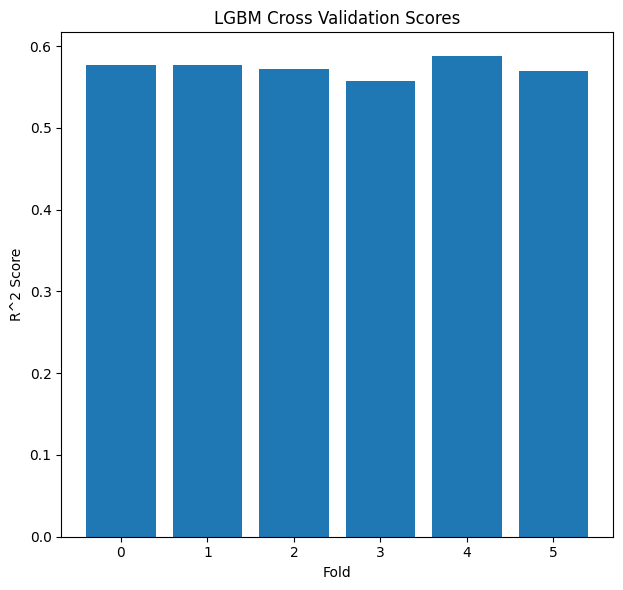

In [5]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV

data = pd.read_csv("train.csv")
target = "Age"
x = data.drop([target, 'id'], axis=1)
y = data[target]
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.8, random_state=42)


#data preprocessing
num_transformer = Pipeline(steps=[
    # ("imputer", SimpleImputer(strategy='median')),
    ("scalar", StandardScaler())
])

sex_values = ["M", "F", "I"]

ord_transformer = Pipeline(steps=[
    # ("imputer", SimpleImputer(strategy='most_frequent')),
    ("ordenc", OrdinalEncoder(categories=[sex_values]))
])

preprocessor = ColumnTransformer(transformers=[
    ("num_features", num_transformer, ["Length", "Diameter", "Height", "Weight", "Shucked Weight", "Viscera Weight", "Shell Weight"]),
    ("ord_features", ord_transformer, ["Sex"]),
])

reg = Pipeline(steps=[
    ("preprocessor", preprocessor),
        ("regressor", LGBMRegressor()),
])

parameters = {
    "regressor__num_leaves":[20, 30, 40],
    "regressor__max_depth":[5, 10, 20],
    "regressor__n_estimators":[100, 250],
    "regressor__learning_rate":[0.01, 0.5],
    "regressor__colsample_bytree":[0.8, 1],
    "regressor__subsample":[0.8, 0.9, 1],
    "regressor__min_child_samples":[10, 20, 30],
}

model_reg = GridSearchCV(reg, param_grid=parameters, scoring="r2", cv=6, verbose=1, n_jobs=4)
model_reg.fit(x_train, y_train)

lgbm_cv_scores = cross_val_score(model_reg.best_estimator_, x_train, y_train, cv=6)
print(f"Cross-Validation scores for XGBoost: {lgbm_cv_scores}")
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(range(len(lgbm_cv_scores)), lgbm_cv_scores)
plt.xlabel('Fold')
plt.ylabel('R^2 Score')
plt.title('LGBM Cross Validation Scores')
plt.tight_layout()
plt.show()


#### <center><span style="color: green;"> HistGradientBoostingRegressor </span> </center>

Fitting 6 folds for each of 486 candidates, totalling 2916 fits
Cross-Validation scores for XGBoost: [0.58646651 0.58398289 0.57882533 0.56931677 0.59605131 0.58065685]


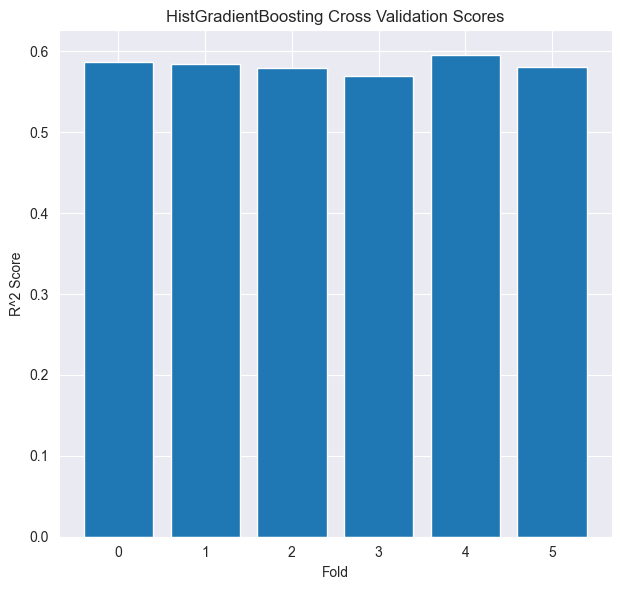

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt

data = pd.read_csv("train.csv")
target = "Age"
x = data.drop([target, 'id'], axis=1)
y = data[target]
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.8, random_state=42)


#data preprocessing
num_transformer = Pipeline(steps=[
    # ("imputer", SimpleImputer(strategy='median')),
    ("scalar", StandardScaler())
])

sex_values = ["M", "F", "I"]

ord_transformer = Pipeline(steps=[
    # ("imputer", SimpleImputer(strategy='most_frequent')),
    ("ordenc", OrdinalEncoder(categories=[sex_values]))
])

preprocessor = ColumnTransformer(transformers=[
    ("num_features", num_transformer, ["Length", "Diameter", "Height", "Weight", "Shucked Weight", "Viscera Weight", "Shell Weight"]),
    ("ord_features", ord_transformer, ["Sex"]),
])

reg = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", HistGradientBoostingRegressor(learning_rate=0.1, loss='poisson', max_bins = 225, max_depth=10,
    max_iter=100, max_leaf_nodes=50)),
])


parameters = {
    "regressor__loss": ["squared_error", "absolute_error", "poisson"], #, "huber", "quantile"
    "regressor__learning_rate": [0.1, 0.5, 1],
    "regressor__max_leaf_nodes": [50, 150],
    "regressor__max_iter": [50, 100, 200],
    "regressor__max_depth": [None, 5, 10],
    "regressor__max_bins": [50, 100, 225],
}

model_reg = GridSearchCV(reg, param_grid =parameters, scoring="r2", cv=6, verbose=1, n_jobs=4)
model_reg.fit(x_train, y_train)

hist_cv_scores = cross_val_score(model_reg.best_estimator_, x_train, y_train, cv=6)
print(f"Cross-Validation scores for XGBoost: {hist_cv_scores}")
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(range(len(hist_cv_scores)), hist_cv_scores)
plt.xlabel('Fold')
plt.ylabel('R^2 Score')
plt.title('HistGradientBoosting Cross Validation Scores')
plt.tight_layout()
plt.show()

#### <center><span style="color: blue;"> GradientBoostingRegressor </span></center>

Fitting 6 folds for each of 384 candidates, totalling 2304 fits
Cross-Validation scores for XGBoost: [0.58196295 0.58022134 0.57356063 0.56734276 0.59530689 0.57735132]


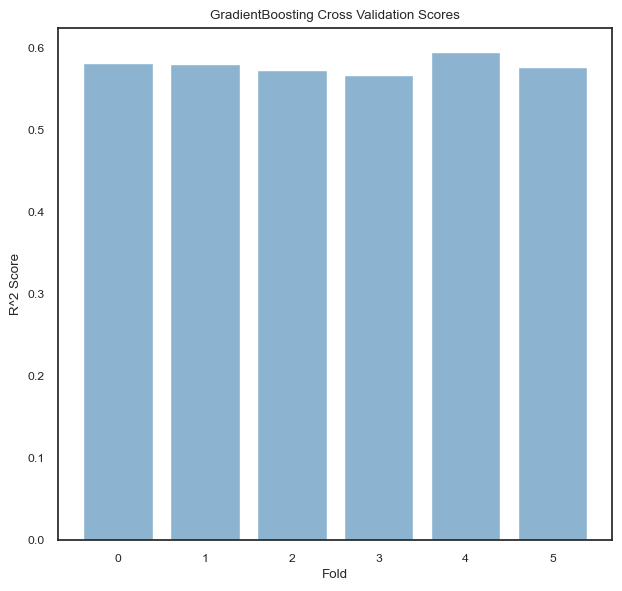

In [6]:
import pandas as pd
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt


data = pd.read_csv("train.csv")
target = "Age"
x = data.drop([target, 'id'], axis=1)
y = data[target]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)


#data preprocessing
num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='median')),
    ("scalar", StandardScaler())
])

sex_values = ["M", "F", "I"]

ord_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ("ordenc", OrdinalEncoder(categories=[sex_values]))
])

preprocessor = ColumnTransformer(transformers=[
    ("num_features", num_transformer, ["Length", "Diameter", "Height", "Weight", "Shucked Weight", "Viscera Weight", "Shell Weight"]),
    ("ord_features", ord_transformer, ["Sex"]),
])

reg = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", GradientBoostingRegressor(criterion='squared_error', learning_rate=0.1, loss='squared_error',
    max_depth=5, max_features='log2', n_estimators=100, subsample=1.0)),
])

parameters = {
    "regressor__loss": ["squared_error", "absolute_error"], #, "huber", "quantile"
    "regressor__learning_rate": [0.1, 1], #, 100
    "regressor__n_estimators": [50, 100], #, 200, 500
    "regressor__criterion": ["friedman_mse", "squared_error"],
    "regressor__subsample": [0.2, 0.5, 1.0],
    "regressor__max_depth": [None, 3, 5, 10],
    "regressor__max_features": ["sqrt", "log2"],
}

model_reg = GridSearchCV(reg, param_grid =parameters, scoring="r2", cv=6, verbose=1, n_jobs=4)
model_reg.fit(x_train, y_train)

GB_cv_scores = cross_val_score(model_reg.best_estimator_, x_train, y_train, cv=6)
print(f"Cross-Validation scores for XGBoost: {GB_cv_scores}")
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(range(len(GB_cv_scores)), GB_cv_scores)
plt.xlabel('Fold')
plt.ylabel('R^2 Score')
plt.title('GradientBoosting Cross Validation Scores')
plt.tight_layout()
plt.show()

#### <center> <span style="color: yellow;"> XGBRegressor </span></center> 

Fitting 6 folds for each of 1152 candidates, totalling 6912 fits
Cross-Validation scores for XGBoost: [0.58073644 0.5780101  0.5707888  0.56132126 0.58427524 0.56993636]


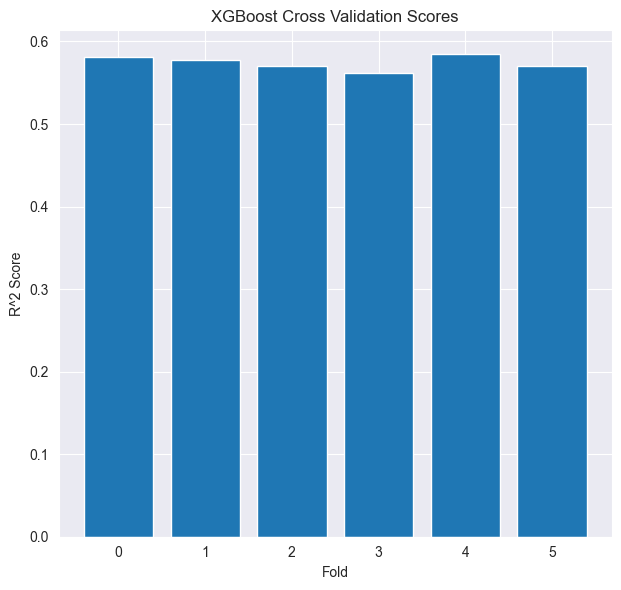

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


data = pd.read_csv("train.csv")
target = "Age"
x = data.drop([target, 'id'], axis=1)
y = data[target]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)


#data preprocessing
num_transformer = Pipeline(steps=[
    # ("imputer", SimpleImputer(strategy='median')),
    ("scalar", StandardScaler())
])

sex_values = ["M", "F", "I"]

ord_transformer = Pipeline(steps=[
    # ("imputer", SimpleImputer(strategy='most_frequent')),
    ("ordenc", OrdinalEncoder(categories=[sex_values]))
])

preprocessor = ColumnTransformer(transformers=[
    ("num_features", num_transformer, ["Length", "Diameter", "Height", "Weight", "Shucked Weight", "Viscera Weight", "Shell Weight"]),
    ("ord_features", ord_transformer, ["Sex"]),
])

reg = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", XGBRegressor(colsample_bytree=0.7, learning_rate=0.05, max_depth=15, min_child_weight=7, n_estimators=100,
    subsample=0.5)),
])

#GridSearch
parameters = {
    "regressor__min_child_weight":[1, 3, 5, 7],
    "regressor__learning_rate": [0.05, 0,1],
    "regressor__colsample_bytree": [ 0.3, 0.4, 0.5, 0.7],
    "regressor__n_estimators": [50, 100],
    "regressor__subsample": [0.2, 0.5, 1.0],
    "regressor__max_depth": [2, 15, 20, 30],
}

model_reg = GridSearchCV(reg, param_grid =parameters, scoring="r2", cv=6, verbose=1, n_jobs=4)
model_reg.fit(x_train, y_train)
xgb_cv_scores = cross_val_score(model_reg.best_estimator_, x_train, y_train, cv=6)
print(f"Cross-Validation scores for XGBoost: {xgb_cv_scores}")
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(range(len(xgb_cv_scores)), xgb_cv_scores)
plt.xlabel('Fold')
plt.ylabel('R^2 Score')
plt.title('XGBoost Cross Validation Scores')
plt.tight_layout()
plt.show()

## Interpret the result: 
<div style="border: 2px solid red; padding: 10px; background-color: inherit;">
    <p>  
        &#x1F4AC When I use cross-validation method, the HistGradientBoosting model performed the best R2 score which is 0.584 and the GradientBoosting model has slightly lower R2 score than HistGradientBoosting (approximately 0.580). 
        Whilst, 0.57 is a score of the 2 left models. It suggested that HistGradientBoosting performed the best in this dataset, the differences between them are not large! 
    </p>
<div>

### <u> 3.3 Model Evaluation:</u>
- As I demonstrated above, 3 evaluations metrics I will use are: RMSE, MAE and R2.  

#### <center><span style="color: orange;"> LGBMRegressor </span> </center>

Evaluation methods for LGBM: 
-------------------------------------------
Average Train RMSE: 2.0355476345707673
Average Validation RMSE: 2.0751435396240985
Average Test RMSE: 2.0549216403211585
-------------------------------------------
Average Train MAE: 1.407208949946373
Average Validation MAE: 1.4297599524047229
Average Test MAE: 1.4205426340166267
-------------------------------------------
Average Train R2: 0.5898269440191781
Average Validation R2 0.5736430578482438
Average Test R2: 0.5777675987787946


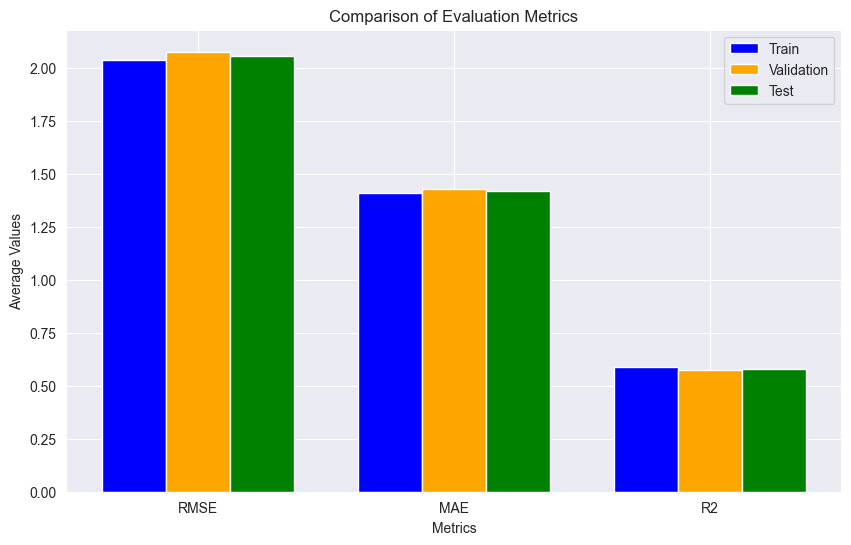

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split,  KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

data = pd.read_csv("train.csv")
target = "Age"
x = data.drop([target, 'id'], axis=1)
y = data[target]

X_train_val, X_test, y_train_val, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

#data preprocessing
num_transformer = Pipeline(steps=[
    # ("imputer", SimpleImputer(strategy='median')),
    ("scalar", StandardScaler())
])

sex_values = ["M", "F", "I"]

ord_transformer = Pipeline(steps=[
    # ("imputer", SimpleImputer(strategy='most_frequent')),
    ("ordenc", OrdinalEncoder(categories=[sex_values]))
])

preprocessor = ColumnTransformer(transformers=[
    ("num_features", num_transformer, ["Length", "Diameter", "Height", "Weight", "Shucked Weight", "Viscera Weight", "Shell Weight"]),
    ("ord_features", ord_transformer, ["Sex"]),
])

reg = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LGBMRegressor(colsample_bytree=1, learning_rate=0.01, max_bins=255, max_depth=10, min_child_samples=30, n_estimators=250,
    num_leaves=40, subsample=0.8)),
])


K = 6
kf = KFold(n_splits = K, shuffle = True, random_state = 1)

train_rmses = []
val_rmses = []
test_rmses = []

train_maes = []
val_maes = []
test_maes = []

train_r2s = []
val_r2s = []
test_r2s = []

for train_index, test_index in kf.split(X_train_val, y_train_val):

    X_train, X_val = X_train_val.iloc[train_index], X_train_val.iloc[test_index]
    y_train, y_val = y_train_val.iloc[train_index], y_train_val.iloc[test_index]
    reg.fit(X_train, y_train)

    y_train_pred = reg.predict(X_train)
    y_val_pred = reg.predict(X_val)
    y_test_pred = reg.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    train_mae = mean_absolute_error(y_train, y_train_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    test_r2 = r2_score(y_test, y_test_pred)


    train_rmses.append(train_rmse)
    val_rmses.append(val_rmse)
    test_rmses.append(test_rmse)

    train_maes.append(train_mae)
    val_maes.append(val_mae)
    test_maes.append(test_mae)

    train_r2s.append(train_r2)
    val_r2s.append(val_r2)
    test_r2s.append(test_r2)

print("Evaluation methods for LGBM: ")
print("-------------------------------------------")
print("Average Train RMSE:", np.mean(train_rmses))
print("Average Validation RMSE:", np.mean(val_rmses))
print("Average Test RMSE:", np.mean(test_rmses))
print("-------------------------------------------")
print("Average Train MAE:", np.mean(train_maes))
print("Average Validation MAE:", np.mean(val_maes))
print("Average Test MAE:", np.mean(test_maes))
print("-------------------------------------------")
print("Average Train R2:", np.mean(train_r2s))
print("Average Validation R2", np.mean(val_r2s))
print("Average Test R2:", np.mean(test_r2s))

metrics = ['RMSE', 'MAE', 'R2']
train_values = [np.mean(train_rmses), np.mean(train_maes), np.mean(train_r2s)]
val_values = [np.mean(val_rmses), np.mean(val_maes), np.mean(val_r2s)]
test_values = [np.mean(test_rmses), np.mean(test_maes), np.mean(test_r2s)]

# Plotting the bar chart
bar_width = 0.25
index = np.arange(len(metrics))

plt.figure(figsize=(10, 6))

bar1 = plt.bar(index, train_values, bar_width, label='Train', color='blue')
bar2 = plt.bar(index + bar_width, val_values, bar_width, label='Validation', color='orange')
bar3 = plt.bar(index + 2 * bar_width, test_values, bar_width, label='Test', color='green')

plt.xlabel('Metrics')
plt.ylabel('Average Values')
plt.title('Comparison of Evaluation Metrics')
plt.xticks(index + bar_width, metrics)
plt.legend()
plt.show()



#### <center><span style="color: green;"> HistGradientBoostingRegressor </span> </center>

Evaluation methods for HistGradientBoosting: 
-------------------------------------------
Average Train RMSE: 1.943950623884498
Average Validation RMSE: 2.0527878516444815
Average Test RMSE: 2.032456603510211
-------------------------------------------
Average Train MAE: 1.3441006436792529
Average Validation MAE: 1.4065931713865396
Average Test MAE: 1.3973393287666624
-------------------------------------------
Average Train R2: 0.6259046252271645
Average Validation R2 0.582769031932714
Average Test R2: 0.5869485912169392


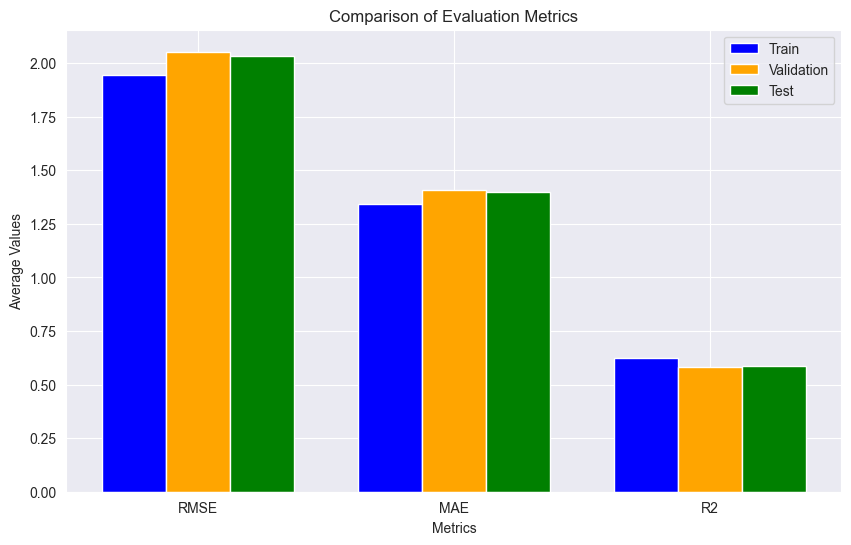

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

data = pd.read_csv("train.csv")
target = "Age"
x = data.drop([target, 'id'], axis=1)
y = data[target]

X_train_val, X_test, y_train_val, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

#data preprocessing
num_transformer = Pipeline(steps=[
    # ("imputer", SimpleImputer(strategy='median')),
    ("scalar", StandardScaler())
])

sex_values = ["M", "F", "I"]

ord_transformer = Pipeline(steps=[
    # ("imputer", SimpleImputer(strategy='most_frequent')),
    ("ordenc", OrdinalEncoder(categories=[sex_values]))
])

preprocessor = ColumnTransformer(transformers=[
    ("num_features", num_transformer, ["Length", "Diameter", "Height", "Weight", "Shucked Weight", "Viscera Weight", "Shell Weight"]),
    ("ord_features", ord_transformer, ["Sex"]),
])

reg = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", HistGradientBoostingRegressor(learning_rate=0.1, loss='poisson', max_bins = 225, max_depth=None,
    max_iter=100, max_leaf_nodes=50)),
])

K = 6
kf = KFold(n_splits = K, shuffle = True, random_state = 1)

train_rmses = []
val_rmses = []
test_rmses = []

train_maes = []
val_maes = []
test_maes = []

train_r2s = []
val_r2s = []
test_r2s = []

for train_index, test_index in kf.split(X_train_val, y_train_val):

    X_train, X_val = X_train_val.iloc[train_index], X_train_val.iloc[test_index]
    y_train, y_val = y_train_val.iloc[train_index], y_train_val.iloc[test_index]
    reg.fit(X_train, y_train)

    y_train_pred = reg.predict(X_train)
    y_val_pred = reg.predict(X_val)
    y_test_pred = reg.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    train_mae = mean_absolute_error(y_train, y_train_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    train_rmses.append(train_rmse)
    val_rmses.append(val_rmse)
    test_rmses.append(test_rmse)

    train_maes.append(train_mae)
    val_maes.append(val_mae)
    test_maes.append(test_mae)

    train_r2s.append(train_r2)
    val_r2s.append(val_r2)
    test_r2s.append(test_r2)

print("Evaluation methods for HistGradientBoosting: ")
print("-------------------------------------------")
print("Average Train RMSE:", np.mean(train_rmses))
print("Average Validation RMSE:", np.mean(val_rmses))
print("Average Test RMSE:", np.mean(test_rmses))
print("-------------------------------------------")
print("Average Train MAE:", np.mean(train_maes))
print("Average Validation MAE:", np.mean(val_maes))
print("Average Test MAE:", np.mean(test_maes))
print("-------------------------------------------")
print("Average Train R2:", np.mean(train_r2s))
print("Average Validation R2", np.mean(val_r2s))
print("Average Test R2:", np.mean(test_r2s))

metrics = ['RMSE', 'MAE', 'R2']
train_values = [np.mean(train_rmses), np.mean(train_maes), np.mean(train_r2s)]
val_values = [np.mean(val_rmses), np.mean(val_maes), np.mean(val_r2s)]
test_values = [np.mean(test_rmses), np.mean(test_maes), np.mean(test_r2s)]

# Plotting the bar chart
bar_width = 0.25
index = np.arange(len(metrics))

plt.figure(figsize=(10, 6))

bar1 = plt.bar(index, train_values, bar_width, label='Train', color='blue')
bar2 = plt.bar(index + bar_width, val_values, bar_width, label='Validation', color='orange')
bar3 = plt.bar(index + 2 * bar_width, test_values, bar_width, label='Test', color='green')

plt.xlabel('Metrics')
plt.ylabel('Average Values')
plt.title('Comparison of Evaluation Metrics')
plt.xticks(index + bar_width, metrics)
plt.legend()
plt.show()


#### <center><span style="color: blue;"> GradientBoostingRegressor </span> </center>

Evaluation methods for GradientBoosting: 
-------------------------------------------
Average Train RMSE: 1.973289707624045
Average Validation RMSE: 2.056963377035095
Average Test RMSE: 2.0349939224210236
-------------------------------------------
Average Train MAE: 1.3652415207649593
Average Validation MAE: 1.4121480514359763
Average Test MAE: 1.401093046084976
-------------------------------------------
Average Train R2: 0.6145333350423637
Average Validation R2 0.5810570096124673
Average Test R2: 0.5859163905981185


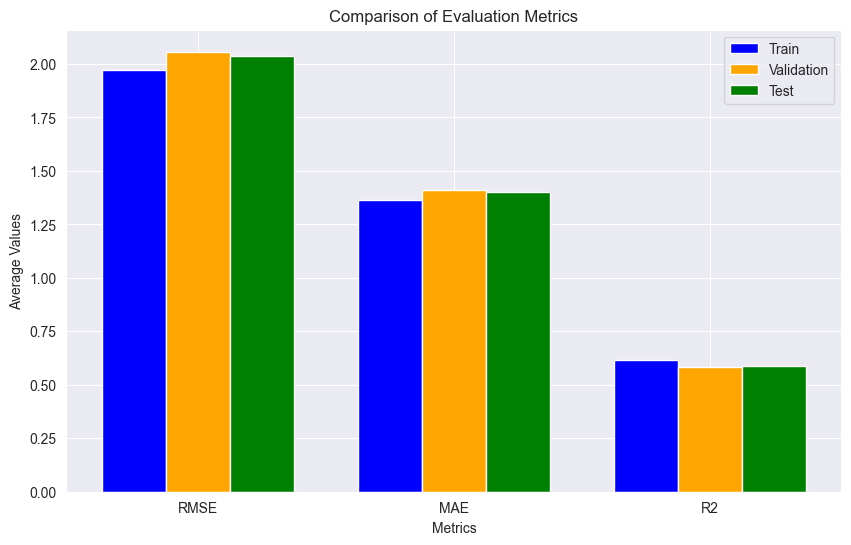

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

data = pd.read_csv("train.csv")
target = "Age"
x = data.drop([target, 'id'], axis=1)
y = data[target]

X_train_val, X_test, y_train_val, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

#data preprocessing
num_transformer = Pipeline(steps=[
    # ("imputer", SimpleImputer(strategy='median')),
    ("scalar", StandardScaler())
])

sex_values = ["M", "F", "I"]

ord_transformer = Pipeline(steps=[
    # ("imputer", SimpleImputer(strategy='most_frequent')),
    ("ordenc", OrdinalEncoder(categories=[sex_values]))
])

preprocessor = ColumnTransformer(transformers=[
    ("num_features", num_transformer, ["Length", "Diameter", "Height", "Weight", "Shucked Weight", "Viscera Weight", "Shell Weight"]),
    ("ord_features", ord_transformer, ["Sex"]),
])

reg = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", GradientBoostingRegressor(criterion ='friedman_mse', learning_rate=0.1, loss='squared_error',
    max_depth=5, max_features='log2', n_estimators=100, subsample=1.0)),
])

K = 6
kf = KFold(n_splits = K, shuffle = True, random_state = 1)

train_rmses = []
val_rmses = []
test_rmses = []

train_maes = []
val_maes = []
test_maes = []

train_r2s = []
val_r2s = []
test_r2s = []

for train_index, test_index in kf.split(X_train_val, y_train_val):

    X_train, X_val = X_train_val.iloc[train_index], X_train_val.iloc[test_index]
    y_train, y_val = y_train_val.iloc[train_index], y_train_val.iloc[test_index]
    reg.fit(X_train, y_train)

    y_train_pred = reg.predict(X_train)
    y_val_pred = reg.predict(X_val)
    y_test_pred = reg.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    train_mae = mean_absolute_error(y_train, y_train_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    train_rmses.append(train_rmse)
    val_rmses.append(val_rmse)
    test_rmses.append(test_rmse)

    train_maes.append(train_mae)
    val_maes.append(val_mae)
    test_maes.append(test_mae)

    train_r2s.append(train_r2)
    val_r2s.append(val_r2)
    test_r2s.append(test_r2)

print("Evaluation methods for GradientBoosting: ")
print("-------------------------------------------")
print("Average Train RMSE:", np.mean(train_rmses))
print("Average Validation RMSE:", np.mean(val_rmses))
print("Average Test RMSE:", np.mean(test_rmses))
print("-------------------------------------------")
print("Average Train MAE:", np.mean(train_maes))
print("Average Validation MAE:", np.mean(val_maes))
print("Average Test MAE:", np.mean(test_maes))
print("-------------------------------------------")
print("Average Train R2:", np.mean(train_r2s))
print("Average Validation R2", np.mean(val_r2s))
print("Average Test R2:", np.mean(test_r2s))

metrics = ['RMSE', 'MAE', 'R2']
train_values = [np.mean(train_rmses), np.mean(train_maes), np.mean(train_r2s)]
val_values = [np.mean(val_rmses), np.mean(val_maes), np.mean(val_r2s)]
test_values = [np.mean(test_rmses), np.mean(test_maes), np.mean(test_r2s)]

# Plotting the bar chart
bar_width = 0.25
index = np.arange(len(metrics))

plt.figure(figsize=(10, 6))

bar1 = plt.bar(index, train_values, bar_width, label='Train', color='blue')
bar2 = plt.bar(index + bar_width, val_values, bar_width, label='Validation', color='orange')
bar3 = plt.bar(index + 2 * bar_width, test_values, bar_width, label='Test', color='green')

plt.xlabel('Metrics')
plt.ylabel('Average Values')
plt.title('Comparison of Evaluation Metrics')
plt.xticks(index + bar_width, metrics)
plt.legend()

plt.show()


#### <center><span style="color: yellow;"> XGBRegressor </span> </center>

Evaluation methods for XGBoost: 
-------------------------------------------
Average Train RMSE: 1.552085420481676
Average Validation RMSE: 2.0727377193224568
Average Test RMSE: 2.0533609932056947
-------------------------------------------
Average Train MAE: 1.0686531341175187
Average Validation MAE: 1.4175518298070697
Average Test MAE: 1.4055165155034863
-------------------------------------------
Average Train R2: 0.7615176886448763
Average Validation R2 0.5746344348017435
Average Test R2: 0.5784062373949462


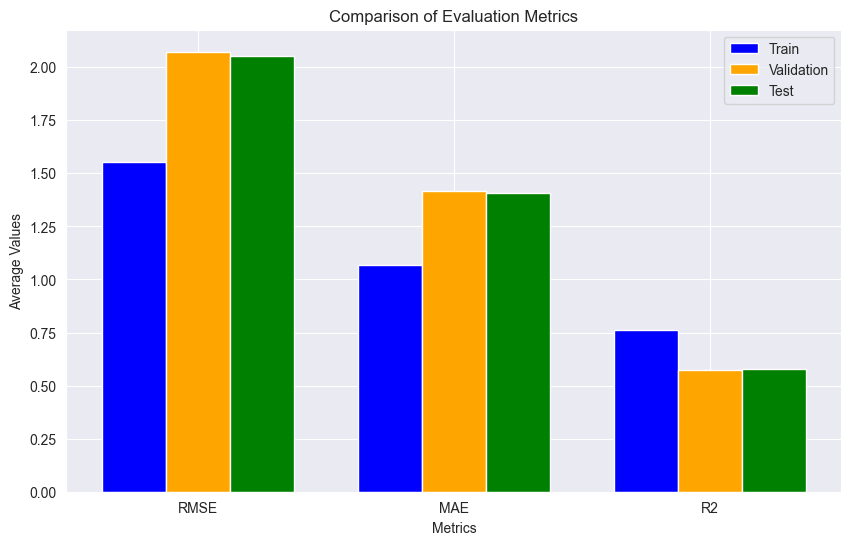

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

data = pd.read_csv("train.csv")
target = "Age"
x = data.drop([target, 'id'], axis=1)
y = data[target]

X_train_val, X_test, y_train_val, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

#data preprocessing
num_transformer = Pipeline(steps=[
    # ("imputer", SimpleImputer(strategy='median')),
    ("scalar", StandardScaler())
])

sex_values = ["M", "F", "I"]

ord_transformer = Pipeline(steps=[
    # ("imputer", SimpleImputer(strategy='most_frequent')),
    ("ordenc", OrdinalEncoder(categories=[sex_values]))
])

preprocessor = ColumnTransformer(transformers=[
    ("num_features", num_transformer, ["Length", "Diameter", "Height", "Weight", "Shucked Weight", "Viscera Weight", "Shell Weight"]),
    ("ord_features", ord_transformer, ["Sex"]),
])

reg = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", XGBRegressor(colsample_bytree=0.7, learning_rate=0.05, max_depth=15, min_child_weight=7, n_estimators=100,
    subsample=0.5)),
])

K = 6
kf = KFold(n_splits = K, shuffle = True, random_state = 1)

train_rmses = []
val_rmses = []
test_rmses = []

train_maes = []
val_maes = []
test_maes = []

train_r2s = []
val_r2s = []
test_r2s = []

for train_index, test_index in kf.split(X_train_val, y_train_val):

    X_train, X_val = X_train_val.iloc[train_index], X_train_val.iloc[test_index]
    y_train, y_val = y_train_val.iloc[train_index], y_train_val.iloc[test_index]
    reg.fit(X_train, y_train)

    y_train_pred = reg.predict(X_train)
    y_val_pred = reg.predict(X_val)
    y_test_pred = reg.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    train_mae = mean_absolute_error(y_train, y_train_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    train_rmses.append(train_rmse)
    val_rmses.append(val_rmse)
    test_rmses.append(test_rmse)

    train_maes.append(train_mae)
    val_maes.append(val_mae)
    test_maes.append(test_mae)

    train_r2s.append(train_r2)
    val_r2s.append(val_r2)
    test_r2s.append(test_r2)

print("Evaluation methods for XGBoost: ")
print("-------------------------------------------")
print("Average Train RMSE:", np.mean(train_rmses))
print("Average Validation RMSE:", np.mean(val_rmses))
print("Average Test RMSE:", np.mean(test_rmses))
print("-------------------------------------------")
print("Average Train MAE:", np.mean(train_maes))
print("Average Validation MAE:", np.mean(val_maes))
print("Average Test MAE:", np.mean(test_maes))
print("-------------------------------------------")
print("Average Train R2:", np.mean(train_r2s))
print("Average Validation R2", np.mean(val_r2s))
print("Average Test R2:", np.mean(test_r2s))

metrics = ['RMSE', 'MAE', 'R2']
train_values = [np.mean(train_rmses), np.mean(train_maes), np.mean(train_r2s)]
val_values = [np.mean(val_rmses), np.mean(val_maes), np.mean(val_r2s)]
test_values = [np.mean(test_rmses), np.mean(test_maes), np.mean(test_r2s)]

# Plotting the bar chart
bar_width = 0.25
index = np.arange(len(metrics))

plt.figure(figsize=(10, 6))

bar1 = plt.bar(index, train_values, bar_width, label='Train', color='blue')
bar2 = plt.bar(index + bar_width, val_values, bar_width, label='Validation', color='orange')
bar3 = plt.bar(index + 2 * bar_width, test_values, bar_width, label='Test', color='green')

plt.xlabel('Metrics')
plt.ylabel('Average Values')
plt.title('Comparison of Evaluation Metrics')
plt.xticks(index + bar_width, metrics)
plt.legend()
plt.show()


## Interpret the result: 
<div style="border: 2px solid red; padding: 10px; background-color: inherit;">
    <p>  
        &#x1F4AC Three first models show nearly same scores of RMSE, MAE and R2. <br>
        &#x1F4AC On the other hand, XGBoost model shows a small number of training performance (when I compared to validation performance) on the 2 metrics RMSE and MAE. Meanwhile, the score of R2 in training set is higher than the other sets. In this case scenario, the model is overfitting to training data. 
    </p>
<div>

### <u> 3.4 Testing Models in test.csv:</u>
As HistGradientBoosting and GradientBoosting model do have better R2 scores and they do have a lower RMSE and MAE scoring than the 2 left models, I will apply both of them to the test.csv dataset. 

#### <center><span style="color: blue;"> GradientBoostingRegressor </span> </center>

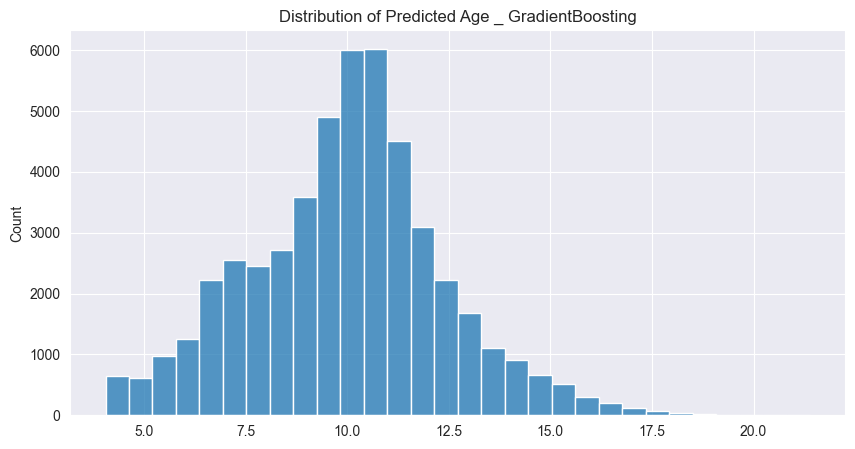

In [18]:
import pandas as pd 
import seaborn as sn
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingRegressor


data = pd.read_csv("train.csv")
target = "Age"
x = data.drop([target, 'id'], axis=1)
y = data[target]

test_data = pd.read_csv("test.csv")
test_ids = test_data['id']
X_test = test_data.drop(columns=['id'])

x_train, x_temp, y_train, y_temp = train_test_split(x, y, train_size=0.8, random_state=42)

# criterion ='friedman_mse', learning_rate=0.1, loss='squared_error',
#     max_depth=5, max_features='log2', n_estimators=100, subsample=1.0

num_transformer = Pipeline(steps=[
    #("imputer", SimpleImputer(strategy='median')),
    ("scalar", StandardScaler())
])

sex_values = ["M", "F", "I"]

ord_transformer = Pipeline(steps=[
    #("imputer", SimpleImputer(strategy='most_frequent')),
    ("ordenc", OrdinalEncoder(categories=[sex_values]))
])

preprocessor = ColumnTransformer(transformers=[
    ("num_features", num_transformer, ["Length", "Diameter", "Height", "Weight", "Shucked Weight", "Viscera Weight", "Shell Weight"]),
    ("ord_features", ord_transformer, ["Sex"]),
])

reg = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", GradientBoostingRegressor(criterion ='friedman_mse', learning_rate=0.1, loss='squared_error',
    max_depth=5, max_features='log2', n_estimators=100, subsample=1.0)),
])
reg.fit(x_train, y_train)
y_test_pred = reg.predict(X_test)

plt.figure(figsize=(10, 5))
sn.histplot(y_test_pred, bins=30)
plt.title('Distribution of Predicted Age _ GradientBoosting')
plt.show()

In [17]:
#Showing the result
submission = pd.DataFrame({
    'id': test_ids,
    'Age': np.ceil(y_test_pred)
})

print(pd.concat([submission.head(), submission.tail()]))

           id   Age
0       74051   8.0
1       74052   8.0
2       74053  11.0
3       74054  10.0
4       74055   8.0
49363  123414  10.0
49364  123415   9.0
49365  123416  13.0
49366  123417  10.0
49367  123418  13.0


#### <center><span style="color: green;"> HistGradientBoostingRegressor </span> </center>

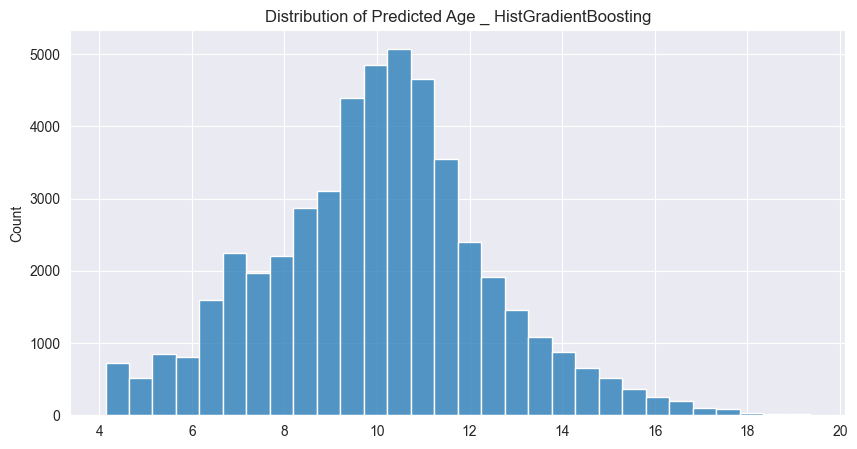

In [19]:
import pandas as pd 
import seaborn as sn
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import HistGradientBoostingRegressor

data = pd.read_csv("train.csv")
target = "Age"
x = data.drop([target, 'id'], axis=1)
y = data[target]

test_data = pd.read_csv("test.csv")
test_ids = test_data['id']
X_test = test_data.drop(columns=['id'])

x_train, x_temp, y_train, y_temp = train_test_split(x, y, train_size=0.8, random_state=42)

# criterion ='friedman_mse', learning_rate=0.1, loss='squared_error',
#     max_depth=5, max_features='log2', n_estimators=100, subsample=1.0

num_transformer = Pipeline(steps=[
    #("imputer", SimpleImputer(strategy='median')),
    ("scalar", StandardScaler())
])

sex_values = ["M", "F", "I"]

ord_transformer = Pipeline(steps=[
    #("imputer", SimpleImputer(strategy='most_frequent')),
    ("ordenc", OrdinalEncoder(categories=[sex_values]))
])

preprocessor = ColumnTransformer(transformers=[
    ("num_features", num_transformer, ["Length", "Diameter", "Height", "Weight", "Shucked Weight", "Viscera Weight", "Shell Weight"]),
    ("ord_features", ord_transformer, ["Sex"]),
])

reg = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", HistGradientBoostingRegressor(learning_rate=0.1, loss='poisson', max_bins = 225, max_depth=None,
    max_iter=100, max_leaf_nodes=50)),
])

reg.fit(x_train, y_train)
y_test_pred = reg.predict(X_test)

plt.figure(figsize=(10, 5))
sn.histplot(y_test_pred, bins=30)
plt.title('Distribution of Predicted Age _ HistGradientBoosting')
plt.show()

In [20]:
#Showing the result
submission = pd.DataFrame({
    'id': test_ids,
    'Age': np.ceil(y_test_pred)
})

print(pd.concat([submission.head(), submission.tail()]))

           id   Age
0       74051   8.0
1       74052   8.0
2       74053  11.0
3       74054  10.0
4       74055   8.0
49363  123414  10.0
49364  123415   8.0
49365  123416  14.0
49366  123417  10.0
49367  123418  13.0


## <u> IV. Some solutions:</u>
Here will be some solutions to enhance models' accuracy.


### <u> 4.1 Features Importance and Permutation Features Importance:</u> 
-Feature importance is a concept used in machine learning to understand and interpret the significance of different features (variables or attributes) in making predictions with a model. It helps answer the question: "Which features contribute the most to the predictions made by the model?" 
-Each model will have a different way of calculating feature importance scores. 
-Permutation Feature Importance is defined to be the decrease in a model score when a single feature value is randomly shuffled. This procedure breaks the relationship between the feature and the target, thus the drop in the model score is indicative of how much the model depends on the feature. 


#### <center><span style="color: yellow;"> XGBRegressor </span> </center>

Fitting 6 folds for each of 1152 candidates, totalling 6912 fits


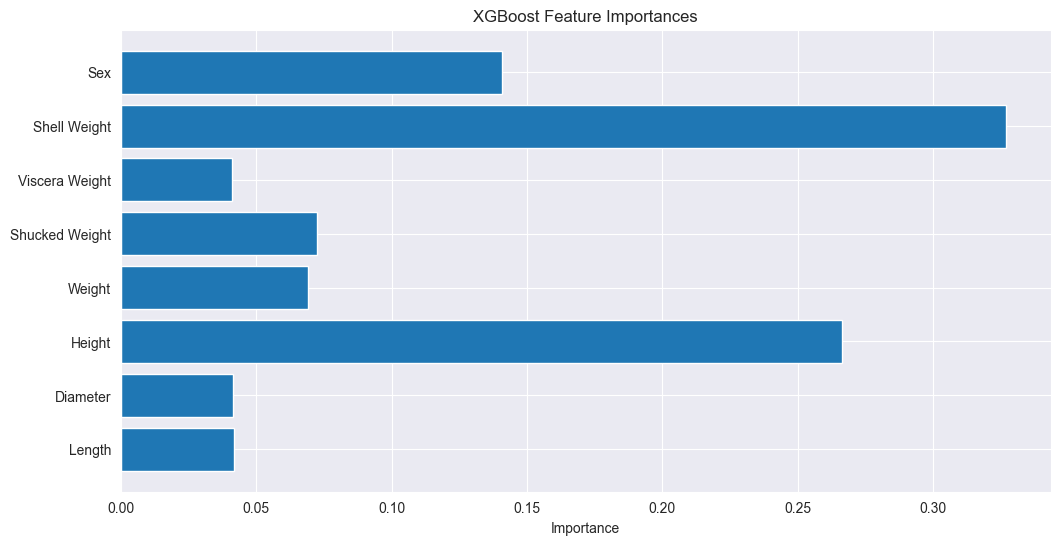

In [1]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

data = pd.read_csv("train.csv")
target = "Age"
x = data.drop([target, 'id'], axis=1)
y = data[target]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)


#data preprocessing
num_transformer = Pipeline(steps=[
    #("imputer", SimpleImputer(strategy='median')),
    ("scalar", StandardScaler())
])

sex_values = ["M", "F", "I"]

ord_transformer = Pipeline(steps=[
    #("imputer", SimpleImputer(strategy='most_frequent')),
    ("ordenc", OrdinalEncoder(categories=[sex_values]))
])

preprocessor = ColumnTransformer(transformers=[
    ("num_features", num_transformer, ["Length", "Diameter", "Height", "Weight", "Shucked Weight", "Viscera Weight", "Shell Weight"]),
    ("ord_features", ord_transformer, ["Sex"]),
])

reg = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", XGBRegressor()),
])

parameters = {
    "regressor__min_child_weight":[1, 3, 5, 7],
    "regressor__learning_rate": [0.05, 0,1],
    "regressor__colsample_bytree": [ 0.3, 0.4, 0.5, 0.7],
    "regressor__n_estimators": [50, 100],
    "regressor__subsample": [0.2, 0.5, 1.0],
    "regressor__max_depth": [2, 15, 20, 30],
}
model_reg = GridSearchCV(reg, param_grid =parameters, scoring="r2", cv=6, verbose=1, n_jobs=4)
model_reg.fit(x_train, y_train)

xgb_importances = model_reg.best_estimator_.named_steps['regressor'].feature_importances_

ohe_feature_names = model_reg.best_estimator_.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out()
numeric_feature_names = model_reg.best_estimator_.named_steps['preprocessor'].transformers_[0][2]

xgb_feature_names = np.concatenate([numeric_feature_names, ohe_feature_names])

# Feature importance plots
plt.figure(figsize=(12, 6))
plt.barh(range(len(xgb_feature_names)), xgb_importances)
plt.yticks(range(len(xgb_feature_names)), xgb_feature_names)
plt.xlabel('Importance')
plt.title('XGBoost Feature Importances')
plt.show()

<div style="border: 2px solid yellow; padding: 10px; background-color: inherit;">
    <p> 
        The Shell Weight is the most importance feature in XGBoost model, followed by Height and Sex. The least importance features are Viscera Weight, Diameter and Length. 
    </p>
</div>

#### <center><span style="color: orange;"> LGBMRegressor </span> </center>

Fitting 6 folds for each of 648 candidates, totalling 3888 fits


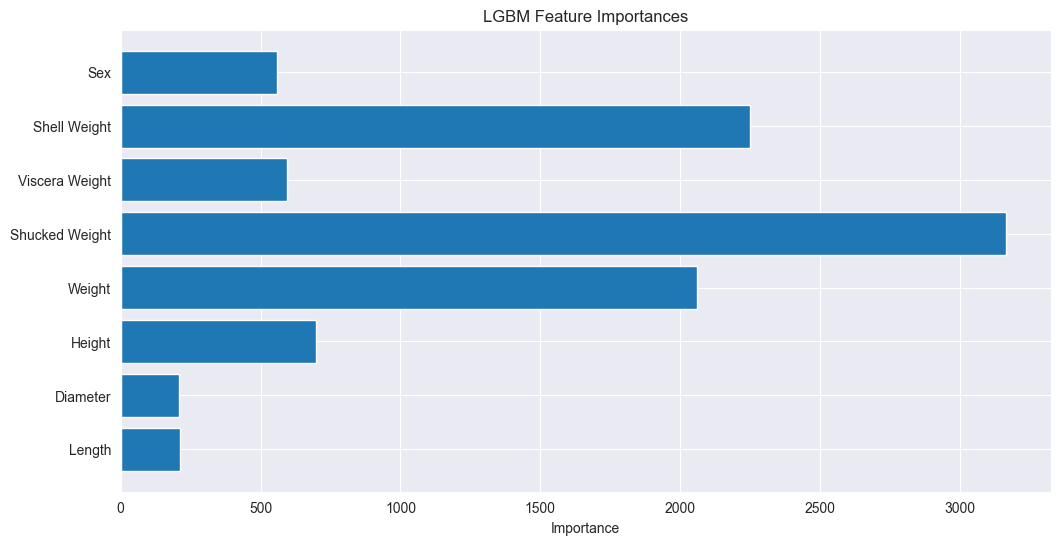

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV

data = pd.read_csv("train.csv")
target = "Age"
x = data.drop([target, 'id'], axis=1)
y = data[target]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)


#data preprocessing
num_transformer = Pipeline(steps=[
    # ("imputer", SimpleImputer(strategy='median')),
    ("scalar", StandardScaler())
])

sex_values = ["M", "F", "I"]

ord_transformer = Pipeline(steps=[
    # ("imputer", SimpleImputer(strategy='most_frequent')),
    ("ordenc", OrdinalEncoder(categories=[sex_values]))
])

preprocessor = ColumnTransformer(transformers=[
    ("num_features", num_transformer, ["Length", "Diameter", "Height", "Weight", "Shucked Weight", "Viscera Weight", "Shell Weight"]),
    ("ord_features", ord_transformer, ["Sex"]),
])

reg = Pipeline(steps=[
    ("preprocessor", preprocessor),
        ("regressor", LGBMRegressor()),
])

parameters = {
    "regressor__num_leaves":[20, 30, 40],
    "regressor__max_depth":[5, 10, 20],
    "regressor__n_estimators":[100, 250],
    "regressor__learning_rate":[0.01, 0.5],
    "regressor__colsample_bytree":[0.8, 1],
    "regressor__subsample":[0.8, 0.9, 1],
    "regressor__min_child_samples":[10, 20, 30],
}

model_reg = GridSearchCV(reg, param_grid=parameters, scoring="r2", cv=6, verbose=1, n_jobs=4)
model_reg.fit(x_train, y_train)

lgbm_importances = model_reg.best_estimator_.named_steps['regressor'].feature_importances_

ohe_feature_names = model_reg.best_estimator_.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out()
numeric_feature_names = model_reg.best_estimator_.named_steps['preprocessor'].transformers_[0][2]

lgbm_feature_names = np.concatenate([numeric_feature_names, ohe_feature_names])

# Feature importance plots
plt.figure(figsize=(12, 6))
plt.barh(range(len(lgbm_feature_names)), lgbm_importances)
plt.yticks(range(len(lgbm_feature_names)), lgbm_feature_names)
plt.xlabel('Importance')
plt.title('LGBM Feature Importances')
plt.show()

<div style="border: 2px solid orange; padding: 10px; background-color: inherit;">
    <p> 
        Shucked Weight is the most importance feature in LGBM model, followed by Shell Weight and Weight. However, Diameter and Length are the least importance features. 
    </p>
</div>

#### <center><span style="color: green;"> HistGradientBoostingRegressor </span> </center>

Fitting 6 folds for each of 486 candidates, totalling 2916 fits


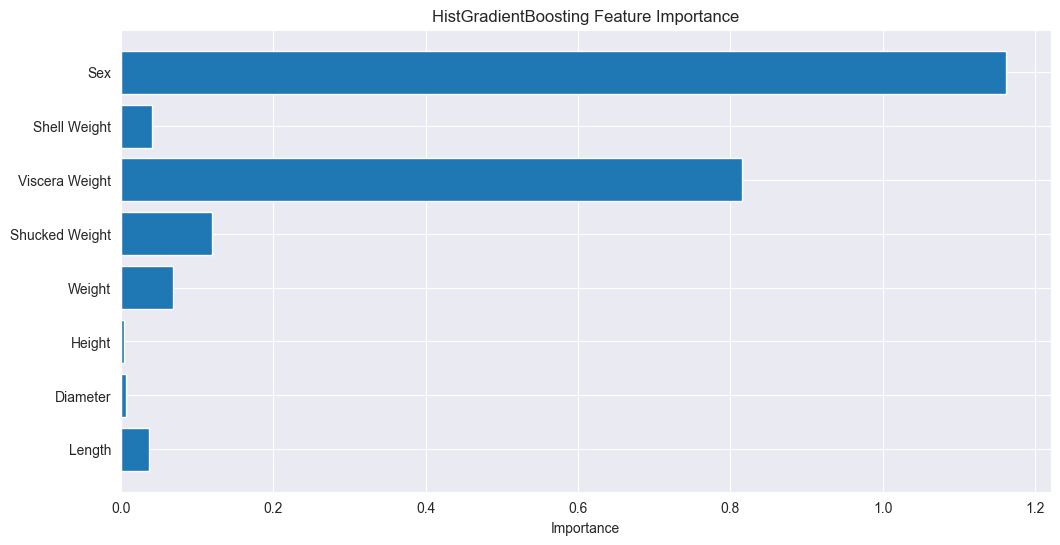

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
import numpy as np
from sklearn.inspection import permutation_importance


data = pd.read_csv("train.csv")
target = "Age"
x = data.drop([target, 'id'], axis=1)
y = data[target]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)


#data preprocessing
num_transformer = Pipeline(steps=[
    #("imputer", SimpleImputer(strategy='median')),
    ("scalar", StandardScaler())
])

sex_values = ["M", "F", "I"]

ord_transformer = Pipeline(steps=[
    #("imputer", SimpleImputer(strategy='most_frequent')),
    ("ordenc", OrdinalEncoder(categories=[sex_values]))
])

preprocessor = ColumnTransformer(transformers=[
    ("num_features", num_transformer, ["Length", "Diameter", "Height", "Weight", "Shucked Weight", "Viscera Weight", "Shell Weight"]),
    ("ord_features", ord_transformer, ["Sex"]),
])

reg = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", HistGradientBoostingRegressor()),
])

parameters = {
    "regressor__loss": ["squared_error", "absolute_error", "poisson"], 
    "regressor__learning_rate": [0.1, 0.5, 1],
    "regressor__max_leaf_nodes": [50, 150],
    "regressor__max_iter": [50, 100, 200],
    "regressor__max_depth": [None, 5, 10],
    "regressor__max_bins": [50, 100, 225],
}

model_reg = GridSearchCV(reg, param_grid =parameters, scoring="r2", cv=6, verbose=1, n_jobs=4)
model_reg.fit(x_train, y_train)

result = permutation_importance(model_reg, x_test, y_test, n_repeats=10, random_state=42)

ohe_feature_names = model_reg.best_estimator_.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out()
numeric_feature_names = model_reg.best_estimator_.named_steps['preprocessor'].transformers_[0][2]

hist_feature_names = np.concatenate([numeric_feature_names, ohe_feature_names])

# Feature importance plots
plt.figure(figsize=(12, 6))
plt.barh(range(len(hist_feature_names)), result.importances_mean)
plt.yticks(range(len(hist_feature_names)), hist_feature_names)
plt.xlabel('Importance')
plt.title('HistGradientBoosting Feature Importance')
plt.show()


<div style="border: 2px solid green; padding: 10px; background-color: inherit;">
    <p> 
        
    </p>
</div>

#### <center><span style="color: blue;"> GradientBoostingRegressor </span> </center>

Fitting 6 folds for each of 384 candidates, totalling 2304 fits


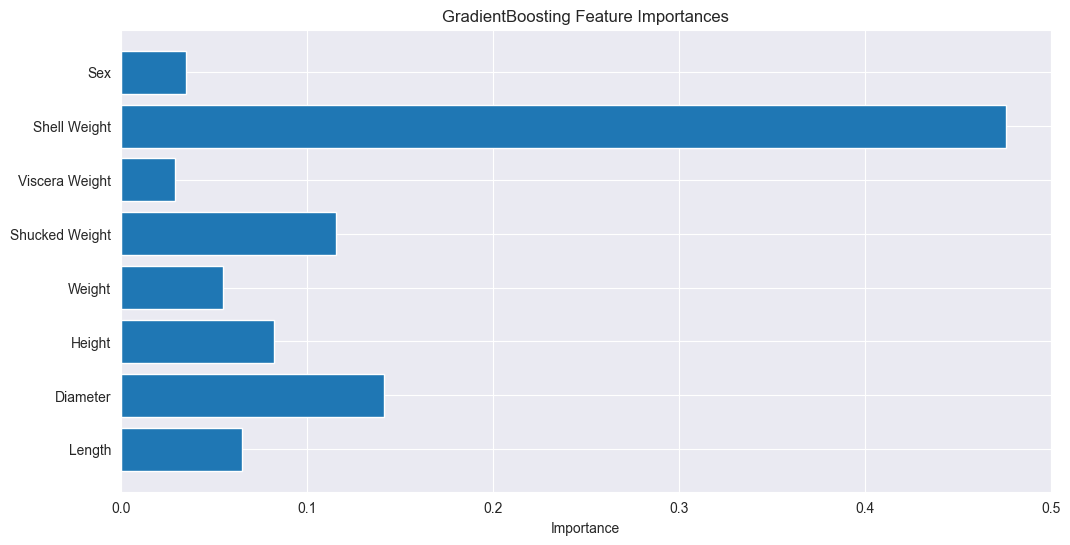

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
import numpy as np

data = pd.read_csv("train.csv")
target = "Age"
x = data.drop([target, 'id'], axis=1)
y = data[target]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)


#data preprocessing
num_transformer = Pipeline(steps=[
    #("imputer", SimpleImputer(strategy='median')),
    ("scalar", StandardScaler())
])

sex_values = ["M", "F", "I"]

ord_transformer = Pipeline(steps=[
    #("imputer", SimpleImputer(strategy='most_frequent')),
    ("ordenc", OrdinalEncoder(categories=[sex_values]))
])

preprocessor = ColumnTransformer(transformers=[
    ("num_features", num_transformer, ["Length", "Diameter", "Height", "Weight", "Shucked Weight", "Viscera Weight", "Shell Weight"]),
    ("ord_features", ord_transformer, ["Sex"]),
])

reg = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", GradientBoostingRegressor()),
])

parameters = {
    "regressor__loss": ["squared_error", "absolute_error"], #, "huber", "quantile"
    "regressor__learning_rate": [0.1, 1], #, 100
    "regressor__n_estimators": [50, 100], #, 200, 500
    "regressor__criterion": ["friedman_mse", "squared_error"],
    "regressor__subsample": [0.2, 0.5, 1.0],
    "regressor__max_depth": [None, 3, 5, 10],
    "regressor__max_features": ["sqrt", "log2"],
}

model_reg = GridSearchCV(reg, param_grid =parameters, scoring="r2", cv=6, verbose=1, n_jobs=4)
model_reg.fit(x_train, y_train)

grad_importances = model_reg.best_estimator_.named_steps['regressor'].feature_importances_
ohe_feature_names = model_reg.best_estimator_.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out()
numeric_feature_names = model_reg.best_estimator_.named_steps['preprocessor'].transformers_[0][2]

grad_feature_names = np.concatenate([numeric_feature_names, ohe_feature_names])

plt.figure(figsize=(12, 6))
plt.barh(range(len(grad_feature_names)), grad_importances)
plt.yticks(range(len(grad_feature_names)), grad_feature_names)
plt.xlabel('Importance')
plt.title('GradientBoosting Feature Importances')
plt.show()

<div style="border: 2px solid blue; padding: 10px; background-color: inherit;">
    <p> 
        According to Gradient Boosting model, Shell Weight is the most importance model, and the least importance feature is the Viscera Weight.
    </p>
</div>

<div style="border: 2px solid red; padding: 10px; background-color: inherit;">
    <p> 
        &#x1F4AC Overall, Shell Weight is the most influential feature in predicting crab age for GradientBoosting, XGBoost and LGBM model. Whereas, it is the worst feature in HistGradientBoosting. <br>
        &#x1F4AC Finally, I want to utilize Feature Importance scores for the purpose of feature selection (which is the process of choosing a subset of relevant features (variables or attributes) from a larger set of features in a dataset). 
    </p>
</div>